In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
zip_path = "/content/drive/My Drive/Dataset.zip"  # Replace with your ZIP file path
extract_path = "/content/Dataset"
os.makedirs(extract_path, exist_ok=True)  # Ensure target folder exists

!unzip -q "$zip_path" -d "$extract_path"
print("Files extracted to:", extract_path)


Files extracted to: /content/Dataset


In [ ]:
for root, dirs, files in os.walk(extract_path):
    print(root, "contains", len(files), "files")


/content/Dataset contains 0 files
/content/Dataset/Dataset contains 0 files
/content/Dataset/Dataset/Bus contains 100 files
/content/Dataset/Dataset/Car contains 100 files
/content/Dataset/Dataset/Truck contains 100 files
/content/Dataset/Dataset/Motorcycle contains 100 files


In [ ]:
DATASET_PATH = "/content/Dataset"


In [ ]:
import os
print("Classes available:", os.listdir(DATASET_PATH))
for class_name in os.listdir(DATASET_PATH):
    print(f"{class_name}: {len(os.listdir(os.path.join(DATASET_PATH, class_name)))} images")


Classes available: ['Dataset']
Dataset: 4 images


In [ ]:
import os
print("Folders in root directory:", os.listdir("/content"))


Folders in root directory: ['.config', 'Dataset', 'drive', 'sample_data']


In [ ]:
dataset_path = "/content/Dataset"  # Update this path if needed
print("Classes in dataset:", os.listdir(dataset_path))


Classes in dataset: ['Dataset']


In [ ]:
DATASET_PATH = "/content/drive/My Drive/Dataset"  # Ensure this path matches the correct location of the Dataset


In [ ]:
!unzip "/content/drive/MyDrive/Dataset.zip" -d "/content/drive/MyDrive/"


Archive:  /content/drive/MyDrive/Dataset.zip
   creating: /content/drive/MyDrive/Dataset/
   creating: /content/drive/MyDrive/Dataset/Bus/
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_1.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_10.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_100.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_11.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_12.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_13.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_14.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_15.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_16.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_17.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_18.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_19.jpg  
  inflating: /content/drive/MyDrive/Dataset/Bus/Image_2.jpg  
  inflating: /content/drive/MyDrive/Dataset

In [ ]:
!ls "/content/drive/MyDrive/Dataset"  # Make sure this path matches where the dataset was unzipped


Bus  Car  Motorcycle  Truck


In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Dataset"


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 237s 23s/step - accuracy: 0.3799 - loss: 1.8562 - val_accuracy: 0.7000 - val_loss: 0.7425 - learning_rate: 1.0000e-04
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 269s 27s/step - accuracy: 0.6182 - loss: 0.9761 - val_accuracy: 0.7500 - val_loss: 0.5959 - learning_rate: 1.0000e-04
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 284s 23s/step - accuracy: 0.6244 - loss: 1.0001 - val_accuracy: 0.7125 - val_loss: 0.6251 - learning_rate: 1.0000e-04
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 232s 23s/step - accuracy: 0.6881 - loss: 0.9597 - val_accuracy: 0.6500 - val_loss: 0.7075 - learning_rate: 1.0000e-04
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 262s 23s/step - accuracy: 0.6946 - loss: 0.8174 - val_accuracy: 0.6250 - val_loss: 0.8013 - learning_rate: 1.0000e-04
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 236s 24s/step - accuracy: 0.7589 - loss: 0.6633 - val_accuracy: 0.7000 - val_loss: 0.6131 - learning_rate: 1.0000e-04
Epoch 7

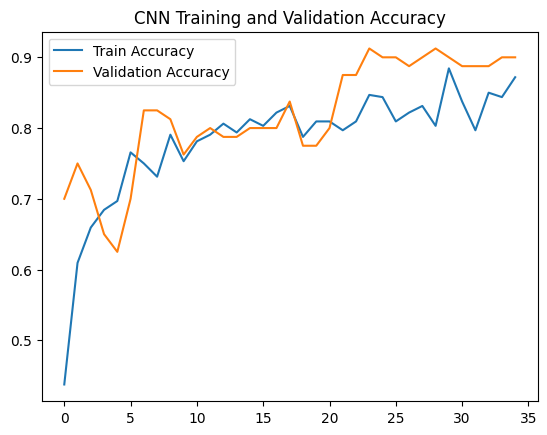

In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16  # For transfer learning
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Step 1: Load Dataset
DATASET_PATH = "/content/drive/My Drive/Dataset"  # Replace with your dataset path
classes = ["Bus", "Car", "Motorcycle", "Truck"]
img_size = 224 #VGG16 input size

# Function to load images and labels (same as before)
def load_data(dataset_path, classes, img_size):
    data = []
    labels = []
    for label, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_size, img_size))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                data.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(data), np.array(labels)

# Load the data
data, labels = load_data(DATASET_PATH, classes, img_size)
data = data / 255.0  # Normalize pixel values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Step 2: Data Augmentation (more aggressive)
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True, # Added vertical flip
    fill_mode='nearest'
)
datagen.fit(X_train)

# Step 3: Transfer Learning with VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze the base model layers

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)  # Reduced dense layer size
x = BatchNormalization()(x) #Batch Normalization
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Compile and Train the model (with callbacks)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6) #Reduce learning rate

cnn_history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100, # Increased epochs
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Step 5: Evaluate the model
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test)
print(f"CNN Model Accuracy: {cnn_accuracy}")

# Step 6: Plot training history (same as before)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("CNN Training and Validation Accuracy")
plt.show()

# Save the model
model.save("/content/drive/My Drive/vehicle_classification_cnn_vgg16.h5")

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.colab import drive

# Google Drive মাউন্ট করা
drive.mount('/content/drive')

# মডেল লোড করার পাথ
model_path = "/content/drive/My Drive/vehicle_classification_cnn_vgg16.h5"
model = load_model(model_path)
print("Model loaded successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model loaded successfully!


In [24]:
# টেস্ট ইমেজ পাথ
image_path = "/content/drive/My Drive/test_image.jpg"  # Replace with your image path

# ইমেজ লোড এবং প্রি-প্রসেসিং
img_size = 224  # VGG16 মডেলের ইনপুট সাইজ
image = load_img(image_path, target_size=(img_size, img_size))
image_array = img_to_array(image) / 255.0  # Normalize the image
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
print("Image loaded and preprocessed successfully!")


Image loaded and preprocessed successfully!


In [25]:
# ক্লাস লেবেল
classes = ["Bus", "Car", "Motorcycle", "Truck"]

# প্রেডিকশন
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# আউটপুট
print(f"Predicted class: {classes[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
Predicted class: Car


In [26]:
# Step 3: নতুন ইমেজের পাথ উল্লেখ করা
new_image_path = "/content/drive/My Drive/new_test_image.jpg"  # Replace with your new image path

# নতুন ইমেজ লোড এবং প্রি-প্রসেসিং
new_image = load_img(new_image_path, target_size=(img_size, img_size))
new_image_array = img_to_array(new_image) / 255.0
new_image_array = np.expand_dims(new_image_array, axis=0)

# নতুন প্রেডিকশন
new_predictions = model.predict(new_image_array)
new_predicted_class = np.argmax(new_predictions, axis=1)[0]

# আউটপুট
print(f"Predicted class for new image: {classes[new_predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
Predicted class for new image: Bus
